<font size="+3"><strong>Gradient Boosting Trees</strong></font>

In [2]:
import pickle
from scipy.io import arff

import ipywidgets as widgets
import pandas as pd
from imblearn.over_sampling import RandomOverSampler
from ipywidgets import interact
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.impute import SimpleImputer
from sklearn.metrics import (
    ConfusionMatrixDisplay,
    classification_report,
    confusion_matrix,
)
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import make_pipeline


In [3]:
def wrangle(filepath):
    data = arff.loadarff(filepath)
    df = pd.DataFrame(data[0])
    df["class"] = df["class"].str.decode("utf-8").astype(int)
    
    new_column_names = {f"Attr{i}": f"feat_{i}" for i in range(1, 65)}
    new_column_names["class"] = "bankrupt"

    df = df.rename(columns=new_column_names)
    return df

In [4]:
df = wrangle("/workspaces/codespaces-jupyter/data/1year.arff")
print(df.shape)
df.head()

(7027, 65)


,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10,...,feat_56,feat_57,feat_58,feat_59,feat_60,feat_61,feat_62,feat_63,feat_64,bankrupt
0,0.200550,0.37951,0.39641,2.0472,32.3510,0.38825,0.249760,1.33050,1.1389,0.50494,...,0.121960,0.39718,0.87804,0.001924,8.4160,5.1372,82.658,4.4158,7.4277,0
1,0.209120,0.49988,0.47225,1.9447,14.7860,0.00000,0.258340,0.99601,1.6996,0.49788,...,0.121300,0.42002,0.85300,0.000000,4.1486,3.2732,107.350,3.4000,60.9870,0
2,0.248660,0.69592,0.26713,1.5548,-1.1523,0.00000,0.309060,0.43695,1.3090,0.30408,...,0.241140,0.81774,0.76599,0.694840,4.9909,3.9510,134.270,2.7185,5.2078,0
3,0.081483,0.30734,0.45879,2.4928,51.9520,0.14988,0.092704,1.86610,1.0571,0.57353,...,0.054015,0.14207,0.94598,0.000000,4.5746,3.6147,86.435,4.2228,5.5497,0
4,0.187320,0.61323,0.22960,1.4063,-7.3128,0.18732,0.187320,0.63070,1.1559,0.38677,...,0.134850,0.48431,0.86515,0.124440,6.3985,4.3158,127.210,2.8692,7.8980,0


### Split

In [5]:
target = "bankrupt"
X = df.drop(columns=target)
y = df[target]

print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (7027, 64)
y shape: (7027,)


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (5621, 64)
y_train shape: (5621,)
X_test shape: (1406, 64)
y_test shape: (1406,)


### Resample

In [8]:
over_sampler = RandomOverSampler(random_state=42)
X_train_over, y_train_over = over_sampler.fit_resample(X_train,y_train)
print("X_train_over shape:", X_train_over.shape)
X_train_over.head()

X_train_over shape: (10802, 64)


,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10,...,feat_55,feat_56,feat_57,feat_58,feat_59,feat_60,feat_61,feat_62,feat_63,feat_64
0,0.535540,0.052232,0.441390,10.49400,165.210000,0.000000,0.535540,18.14500,1.81560,0.94777,...,27537.0,0.536310,0.565050,0.48781,0.000000,25.4630,4.6517,9.3465,39.0520,3.5452
1,0.000681,0.486750,-0.017475,0.94759,-5.587200,0.032626,0.000681,0.45175,0.99660,0.21989,...,-262.9,-0.003411,0.003096,1.00340,0.697370,106.4600,13.3880,35.6920,10.2260,4.9842
2,0.081678,0.422160,0.456520,2.70710,-0.063859,0.000000,0.101790,1.36880,1.97560,0.57784,...,2266.8,0.044539,0.141350,0.94900,0.000000,4.3322,9.3488,49.4080,7.3874,7.1565
3,0.172720,0.159200,0.627720,5.13760,16.825000,0.000000,0.172720,5.28150,1.93310,0.84080,...,1421.6,0.097010,0.205430,0.91067,0.008902,3.5406,9.2799,28.6460,12.7420,8.7645
4,0.070920,0.826400,-0.091116,0.71330,-85.703000,0.000000,0.070920,0.21007,0.79853,0.17360,...,-3796.8,0.102350,0.408520,0.91186,1.896600,11.1470,6.0414,145.2700,2.5126,1.0326


## Build Model

In [9]:
acc_baseline = y.value_counts(normalize=True).max()
print("Baseline Accuracy:", round(acc_baseline, 4))

Baseline Accuracy: 0.9614


### iterate

In [10]:
clf = make_pipeline(
    SimpleImputer(),
    GradientBoostingClassifier()
)

In [11]:
params = {
    "simpleimputer__strategy":["mean","median"],
    "gradientboostingclassifier__n_estimators":range(20,31,5),
    "gradientboostingclassifier__max_depth" : range(2,5)
}
params

{'simpleimputer__strategy': ['mean', 'median'],
 'gradientboostingclassifier__n_estimators': range(20, 31, 5),
 'gradientboostingclassifier__max_depth': range(2, 5)}

In [12]:
model = GridSearchCV(clf,param_grid=params,verbose=1,n_jobs=-1,cv=5)

In [13]:
model.fit(X_train_over,y_train_over)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('simpleimputer', SimpleImputer()),
                                       ('gradientboostingclassifier',
                                        GradientBoostingClassifier())]),
             n_jobs=-1,
             param_grid={'gradientboostingclassifier__max_depth': range(2, 5),
                         'gradientboostingclassifier__n_estimators': range(20, 31, 5),
                         'simpleimputer__strategy': ['mean', 'median']},
             verbose=1)

In [14]:
results = pd.DataFrame(model.cv_results_)
results.sort_values("rank_test_score").head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_gradientboostingclassifier__max_depth,param_gradientboostingclassifier__n_estimators,param_simpleimputer__strategy,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
17,6.391792,0.586523,0.006977,0.000896,4,30,median,"{'gradientboostingclassifier__max_depth': 4, '...",0.961592,0.962517,0.953241,0.961111,0.962037,0.960100,0.003461,1
16,6.683182,0.038065,0.010259,0.005454,4,30,mean,"{'gradientboostingclassifier__max_depth': 4, '...",0.966219,0.954188,0.954630,0.959259,0.965278,0.959915,0.005093,2
14,5.592139,0.081214,0.010957,0.006720,4,25,mean,"{'gradientboostingclassifier__max_depth': 4, '...",0.953725,0.944933,0.944907,0.950926,0.961111,0.951120,0.006058,3
15,5.696603,0.076282,0.007279,0.000114,4,25,median,"{'gradientboostingclassifier__max_depth': 4, '...",0.951874,0.954188,0.936574,0.953704,0.957870,0.950842,0.007395,4
12,4.524913,0.108147,0.006884,0.000117,4,20,mean,"{'gradientboostingclassifier__max_depth': 4, '...",0.929662,0.939380,0.932407,0.938426,0.953704,0.938716,0.008330,5
13,4.489461,0.094550,0.006813,0.000055,4,20,median,"{'gradientboostingclassifier__max_depth': 4, '...",0.931050,0.937529,0.911111,0.940278,0.943981,0.932790,0.011634,6
10,5.309102,0.086250,0.007565,0.000403,3,30,mean,"{'gradientboostingclassifier__max_depth': 3, '...",0.906062,0.915317,0.918056,0.924537,0.928704,0.918535,0.007818,7
8,4.383008,0.169697,0.006882,0.000055,3,25,mean,"{'gradientboostingclassifier__max_depth': 3, '...",0.904211,0.907450,0.912037,0.915741,0.922685,0.912425,0.006460,8
11,6.008763,0.390516,0.007248,0.000153,3,30,median,"{'gradientboostingclassifier__max_depth': 3, '...",0.890329,0.899584,0.912963,0.918056,0.918519,0.907890,0.011131,9
6,3.725682,0.089947,0.011345,0.006315,3,20,mean,"{'gradientboostingclassifier__max_depth': 3, '...",0.892180,0.897733,0.895370,0.901852,0.902315,0.897890,0.003854,10


In [15]:
model.best_params_

{'gradientboostingclassifier__max_depth': 4,
 'gradientboostingclassifier__n_estimators': 30,
 'simpleimputer__strategy': 'median'}

In [16]:
acc_train = model.score(X_train,y_train)
acc_test = model.score(X_test,y_test)

print("Training Accuracy:", round(acc_train, 4))
print("Validation Accuracy:", round(acc_test, 4))

Training Accuracy: 0.9452
Validation Accuracy: 0.9203


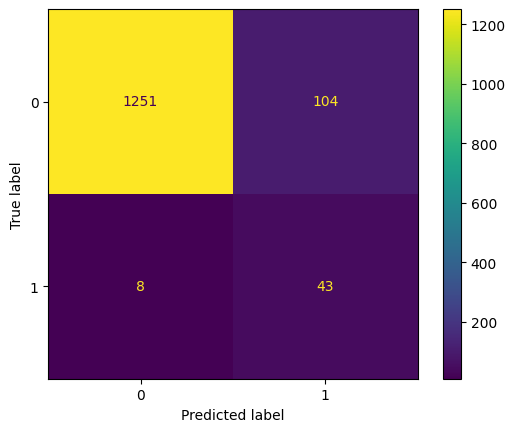

In [17]:
ConfusionMatrixDisplay.from_estimator(model,X_test,y_test);

In [18]:
print(classification_report(y_test,model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.99      0.92      0.96      1355
           1       0.29      0.84      0.43        51

    accuracy                           0.92      1406
   macro avg       0.64      0.88      0.70      1406
weighted avg       0.97      0.92      0.94      1406



profit: €4300000000
losses: €26000000000


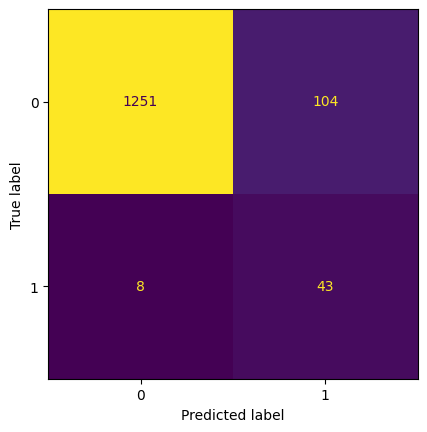

In [19]:
th=0.5
y_pred_proba=model.predict_proba(X_test)[:,-1]
y_pred = y_pred_proba > th
conf_matrix = confusion_matrix(y_test,y_pred)
tn,fp,fn,tp = conf_matrix.ravel()
print(f"profit: €{tp * 100_000_000}")
print(f"losses: €{fp * 250_000_000}")
ConfusionMatrixDisplay.from_predictions(y_test,y_pred,colorbar=False)

In [20]:
def make_cnf_matrix(threshold):
    y_pred_proba=model.predict_proba(X_test)[:,-1]
    y_pred = y_pred_proba > threshold
    conf_matrix = confusion_matrix(y_test,y_pred)
    tn,fp,fn,tp = conf_matrix.ravel()
    print(f"profit: €{tp * 100_000_000}")
    print(f"losses: €{fp * 250_000_000}")
    ConfusionMatrixDisplay.from_predictions(y_test,y_pred,colorbar=False)


thresh_widget = widgets.FloatSlider(min=0,max=1,value=0.5,step=0.05)

interact(make_cnf_matrix, threshold=thresh_widget);

interactive(children=(FloatSlider(value=0.5, description='threshold', max=1.0, step=0.05), Output()), _dom_cla…

## Saving the model

In [21]:
with open("gradient_boosting_model.pkl","wb") as f:
    pickle.dump(model,f)